In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [51]:
df_2021 = pd.read_csv('S2301.csv')
df_2021.head()

,Label (Grouping),District of Columbia!!Total!!Estimate,District of Columbia!!Labor Force Participation Rate!!Estimate,District of Columbia!!Employment/Population Ratio!!Estimate,District of Columbia!!Unemployment rate!!Estimate,"Census Tract 64, District of Columbia, District of Columbia!!Total!!Estimate","Census Tract 64, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate","Census Tract 64, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate","Census Tract 64, District of Columbia, District of Columbia!!Unemployment rate!!Estimate","Census Tract 102.01, District of Columbia, District of Columbia!!Total!!Estimate",...,"Census Tract 105, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate","Census Tract 105, District of Columbia, District of Columbia!!Unemployment rate!!Estimate","Census Tract 110.01, District of Columbia, District of Columbia!!Total!!Estimate","Census Tract 110.01, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate","Census Tract 110.01, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate","Census Tract 110.01, District of Columbia, District of Columbia!!Unemployment rate!!Estimate","Census Tract 110.02, District of Columbia, District of Columbia!!Total!!Estimate","Census Tract 110.02, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate","Census Tract 110.02, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate","Census Tract 110.02, District of Columbia, District of Columbia!!Unemployment rate!!Estimate"
0,Population 16 years and over,"568,405",71.4%,65.8%,7.1%,"2,003",57.8%,49.1%,13.4%,"2,311",...,78.7%,3.5%,"2,320",84.1%,80.5%,0.5%,"1,479",74.9%,67.0%,7.4%
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16 to 19 years,"31,368",28.9%,21.1%,26.3%,115,41.7%,11.3%,72.9%,1,...,27.5%,44.4%,0,-,-,-,0,-,-,-
3,20 to 24 years,"49,311",69.0%,58.2%,14.4%,104,84.6%,49.0%,42.0%,150,...,67.7%,18.2%,35,100.0%,100.0%,0.0%,52,100.0%,59.6%,0.0%
4,25 to 29 years,"77,357",87.2%,81.2%,6.3%,281,78.3%,70.5%,5.3%,545,...,87.9%,6.7%,571,93.9%,84.8%,0.0%,91,100.0%,91.2%,0.0%


In [52]:
#Renaming columns

def preproc(df):
    
    #renaming columns
    df = df.rename(columns={
           'Label (Grouping)': 'Labels', 
           'District of Columbia!!Total!!Estimate': 'DC_estimate',
           'District of Columbia!!Labor Force Participation Rate!!Estimate': 'DC_labor_force_participation_estimate',
           'District of Columbia!!Employment/Population Ratio!!Estimate': 'DC_employment_population_ratio_estimate',
           'District of Columbia!!Unemployment rate!!Estimate':'DC_unemployment_rate_estimate',
           'Census Tract 64, District of Columbia, District of Columbia!!Total!!Estimate': 'DC_64_estimate',
           'Census Tract 64, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate':'DC_64_labor_force_participation_estimate',
           'Census Tract 64, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate':'DC_64_employment_population_ratio_estimate',
           'Census Tract 64, District of Columbia, District of Columbia!!Unemployment rate!!Estimate': 'DC_64_unemployment_rate_estimate',


           'Census Tract 102.01, District of Columbia, District of Columbia!!Total!!Estimate': 'DC_102.01_estimate',
           'Census Tract 102.01, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate': 'DC_102.01_labor_force_participation_estimate',
           'Census Tract 102.01, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate': 'DC_102.01_employment_population_ratio_estimate',
           'Census Tract 102.01, District of Columbia, District of Columbia!!Unemployment rate!!Estimate': 'DC_102.01_unemployment_rate_estimate',



           'Census Tract 102.02, District of Columbia, District of Columbia!!Total!!Estimate': 'DC_102.02_estimate',
           'Census Tract 102.02, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate': 'DC_102.02_labor_force_participation_estimate',
           'Census Tract 102.02, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate': 'DC_102.02_employment_population_ratio_estimate',
           'Census Tract 102.02, District of Columbia, District of Columbia!!Unemployment rate!!Estimate': 'DC_102.02_unemployment_rate_estimate',



           'Census Tract 105, District of Columbia, District of Columbia!!Total!!Estimate': 'DC_105_estimate',
           'Census Tract 105, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate': 'DC_105_labor_force_participation_estimate',
           'Census Tract 105, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate': 'DC_105_employment_population_ratio_estimate',
           'Census Tract 105, District of Columbia, District of Columbia!!Unemployment rate!!Estimate': 'DC_105_unemployment_rate_estimate',


           'Census Tract 110.01, District of Columbia, District of Columbia!!Total!!Estimate': 'DC_110.01_estimate',
           'Census Tract 110.01, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate': 'DC_110.01_labor_force_participation_estimate',
           'Census Tract 110.01, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate': 'DC_110.01_employment_population_ratio_estimate',
           'Census Tract 110.01, District of Columbia, District of Columbia!!Unemployment rate!!Estimate': 'DC_110.01_unemployment_rate_estimate',


           'Census Tract 110.02, District of Columbia, District of Columbia!!Total!!Estimate': 'DC_110.02_estimate',
           'Census Tract 110.02, District of Columbia, District of Columbia!!Labor Force Participation Rate!!Estimate': 'DC_110.02_labor_force_participation_estimate',
           'Census Tract 110.02, District of Columbia, District of Columbia!!Employment/Population Ratio!!Estimate': 'DC_110.02_employment_population_ratio_estimate',
           'Census Tract 110.02, District of Columbia, District of Columbia!!Unemployment rate!!Estimate': 'DC_110.02_unemployment_rate_estimate'   
    })

    df['Labels'] = df['Labels'].str.lstrip('\xa0')

    #Replacing Nans with -1 
    df = df.fillna(-1)


    #Adjusting the labels values 
    df['Labels'] = df['Labels'].str.lower().str.capitalize()


    return df

In [53]:
df_2021 = preproc(df_2021) 

In [54]:
# define a function that removes commas and converts the strings to integers
def clean_int(x):
    if isinstance(x, str):
        x = x.replace(',', '')
        try:
            x = int(x)
        except ValueError:
            pass
    return x

# apply the function to all columns in the dataframe using applymap()
df_2021 = df_2021.applymap(clean_int)
df_2021

,Labels,DC_estimate,DC_labor_force_participation_estimate,DC_employment_population_ratio_estimate,DC_unemployment_rate_estimate,DC_64_estimate,DC_64_labor_force_participation_estimate,DC_64_employment_population_ratio_estimate,DC_64_unemployment_rate_estimate,DC_102.01_estimate,...,DC_105_employment_population_ratio_estimate,DC_105_unemployment_rate_estimate,DC_110.01_estimate,DC_110.01_labor_force_participation_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.01_unemployment_rate_estimate,DC_110.02_estimate,DC_110.02_labor_force_participation_estimate,DC_110.02_employment_population_ratio_estimate,DC_110.02_unemployment_rate_estimate
0,Population 16 years and over,568405,71.4%,65.8%,7.1%,2003,57.8%,49.1%,13.4%,2311,...,78.7%,3.5%,2320,84.1%,80.5%,0.5%,1479,74.9%,67.0%,7.4%
1,Age,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,16 to 19 years,31368,28.9%,21.1%,26.3%,115,41.7%,11.3%,72.9%,1,...,27.5%,44.4%,0,-,-,-,0,-,-,-
3,20 to 24 years,49311,69.0%,58.2%,14.4%,104,84.6%,49.0%,42.0%,150,...,67.7%,18.2%,35,100.0%,100.0%,0.0%,52,100.0%,59.6%,0.0%
4,25 to 29 years,77357,87.2%,81.2%,6.3%,281,78.3%,70.5%,5.3%,545,...,87.9%,6.7%,571,93.9%,84.8%,0.0%,91,100.0%,91.2%,0.0%
5,30 to 34 years,78357,91.0%,85.7%,5.0%,333,95.8%,88.9%,3.6%,504,...,92.4%,0.0%,335,100.0%,100.0%,0.0%,180,100.0%,100.0%,0.0%
6,35 to 44 years,106798,88.7%,82.2%,6.0%,393,67.7%,57.3%,15.4%,527,...,90.6%,0.0%,274,96.7%,88.3%,0.0%,218,100.0%,67.0%,30.1%
7,45 to 54 years,73601,83.2%,77.5%,6.3%,198,57.1%,57.1%,0.0%,141,...,63.8%,6.2%,393,100.0%,100.0%,0.0%,289,100.0%,100.0%,0.0%
8,55 to 59 years,35195,73.2%,68.6%,6.2%,122,33.6%,33.6%,0.0%,134,...,57.6%,0.0%,261,76.2%,72.8%,4.5%,126,88.9%,88.9%,0.0%
9,60 to 64 years,33219,62.4%,58.1%,6.7%,100,39.0%,22.0%,43.6%,74,...,100.0%,0.0%,190,78.9%,78.9%,0.0%,92,51.1%,51.1%,0.0%


#### Poverty Level across tracts

In [55]:
df_poverty = df_2021[df_2021['Labels'].isin(['At or above the poverty level', 'Below poverty level'])]
df_poverty_estimate = df_poverty[['Labels', 'DC_estimate','DC_64_estimate','DC_102.01_estimate','DC_102.02_estimate','DC_105_estimate','DC_110.01_estimate','DC_110.02_estimate']]
df_poverty_estimate = df_poverty_estimate.reset_index(drop = True)
df_poverty_estimate

,Labels,DC_estimate,DC_64_estimate,DC_102.01_estimate,DC_102.02_estimate,DC_105_estimate,DC_110.01_estimate,DC_110.02_estimate
0,Below poverty level,58625,552,125,112,578,42,41
1,At or above the poverty level,380662,979,1950,1257,2744,2017,957


In [56]:
del df_poverty_estimate['DC_estimate']

In [57]:
# set the index to the Labels column
df_poverty_estimate = df_poverty_estimate.set_index('Labels')

In [58]:
df_poverty_estimate

,DC_64_estimate,DC_102.01_estimate,DC_102.02_estimate,DC_105_estimate,DC_110.01_estimate,DC_110.02_estimate
Labels,,,,,,
Below poverty level,552,125,112,578,42,41
At or above the poverty level,979,1950,1257,2744,2017,957


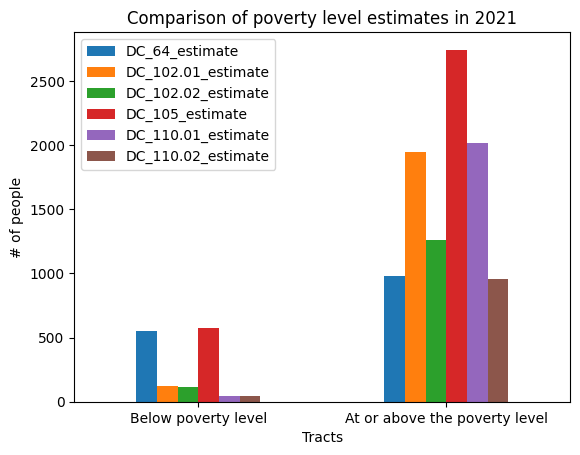

In [107]:
# plot the bar chart with custom labels
ax = df_poverty_estimate.plot.bar(rot=0)
ax.set_title("Comparison of poverty level estimates in 2021")
ax.set_xlabel('Tracts')
ax.set_ylabel('# of people')


plt.show()

#### Unemployment rate by tract

In [60]:
df_2021.head()

,Labels,DC_estimate,DC_labor_force_participation_estimate,DC_employment_population_ratio_estimate,DC_unemployment_rate_estimate,DC_64_estimate,DC_64_labor_force_participation_estimate,DC_64_employment_population_ratio_estimate,DC_64_unemployment_rate_estimate,DC_102.01_estimate,...,DC_105_employment_population_ratio_estimate,DC_105_unemployment_rate_estimate,DC_110.01_estimate,DC_110.01_labor_force_participation_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.01_unemployment_rate_estimate,DC_110.02_estimate,DC_110.02_labor_force_participation_estimate,DC_110.02_employment_population_ratio_estimate,DC_110.02_unemployment_rate_estimate
0,Population 16 years and over,568405,71.4%,65.8%,7.1%,2003,57.8%,49.1%,13.4%,2311,...,78.7%,3.5%,2320,84.1%,80.5%,0.5%,1479,74.9%,67.0%,7.4%
1,Age,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,16 to 19 years,31368,28.9%,21.1%,26.3%,115,41.7%,11.3%,72.9%,1,...,27.5%,44.4%,0,-,-,-,0,-,-,-
3,20 to 24 years,49311,69.0%,58.2%,14.4%,104,84.6%,49.0%,42.0%,150,...,67.7%,18.2%,35,100.0%,100.0%,0.0%,52,100.0%,59.6%,0.0%
4,25 to 29 years,77357,87.2%,81.2%,6.3%,281,78.3%,70.5%,5.3%,545,...,87.9%,6.7%,571,93.9%,84.8%,0.0%,91,100.0%,91.2%,0.0%


In [61]:
#Unemployment rates

df_u = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u = df_u[df_u["Labels"] == 'Population 16 years and over']

df_u

,Labels,DC_unemployment_rate_estimate,DC_64_unemployment_rate_estimate,DC_102.01_unemployment_rate_estimate,DC_102.02_unemployment_rate_estimate,DC_105_unemployment_rate_estimate,DC_110.01_unemployment_rate_estimate,DC_110.02_unemployment_rate_estimate
0,Population 16 years and over,7.1%,13.4%,4.6%,1.5%,3.5%,0.5%,7.4%


In [62]:
# Convert the percentage strings to floats
df_u = df_u.apply(lambda x: x.str.rstrip('%'))



In [63]:
# convert percentage values to floats
df_u.iloc[:, 1:] = df_u.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))

In [64]:
#exclude the first column
df_u = df_u.iloc[:, 1:]
df_u


,DC_unemployment_rate_estimate,DC_64_unemployment_rate_estimate,DC_102.01_unemployment_rate_estimate,DC_102.02_unemployment_rate_estimate,DC_105_unemployment_rate_estimate,DC_110.01_unemployment_rate_estimate,DC_110.02_unemployment_rate_estimate
0,7.1,13.4,4.6,1.5,3.5,0.5,7.4


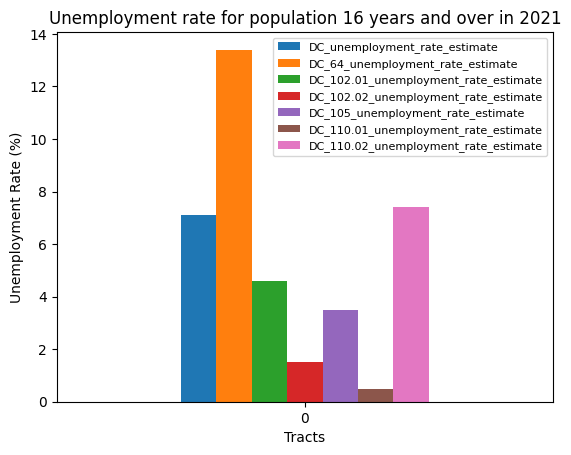

In [65]:
ax = df_u.plot.bar(rot=0)
ax.set_title('Unemployment rate for population 16 years and over in 2021') # convert the float to a string before concatenating
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=8) # set the font size of the legend to 8
plt.show()

#### Break down by gender

In [66]:
#Males
df_u_male = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u_male = df_u_male[df_u_male["Labels"] == 'Male']

df_u_male

,Labels,DC_unemployment_rate_estimate,DC_64_unemployment_rate_estimate,DC_102.01_unemployment_rate_estimate,DC_102.02_unemployment_rate_estimate,DC_105_unemployment_rate_estimate,DC_110.01_unemployment_rate_estimate,DC_110.02_unemployment_rate_estimate
24,Male,6.7%,12.5%,6.2%,3.7%,5.2%,0.0%,4.7%


In [67]:
# Convert the percentage strings to floats
df_u_male = df_u_male.apply(lambda x: x.str.rstrip('%'))

# convert percentage values to floats
df_u_male.iloc[:, 1:] = df_u_male.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))


#exclude the first column
df_u_male = df_u_male.iloc[:, 1:]

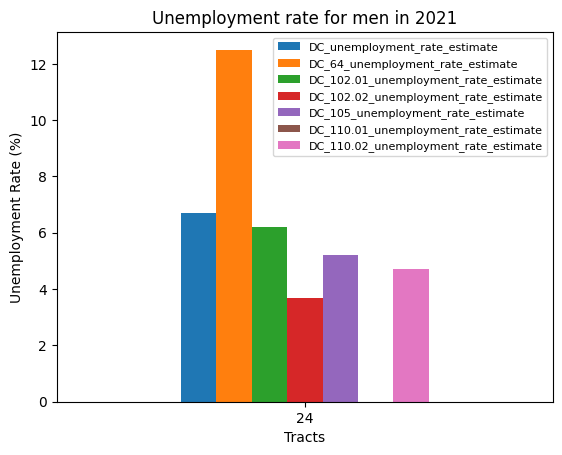

In [93]:
ax = df_u_male.plot.bar(rot=0)
ax.set_title('Unemployment rate for men in 2021') # convert the float to a string before concatenating
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=8) # set the font size of the legend to 8
plt.show()

In [69]:
#Females 
df_u_female = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u_female = df_u_female[df_u_female["Labels"] == 'Female']

df_u_female

,Labels,DC_unemployment_rate_estimate,DC_64_unemployment_rate_estimate,DC_102.01_unemployment_rate_estimate,DC_102.02_unemployment_rate_estimate,DC_105_unemployment_rate_estimate,DC_110.01_unemployment_rate_estimate,DC_110.02_unemployment_rate_estimate
25,Female,6.7%,9.3%,2.4%,0.0%,1.1%,0.9%,8.4%


In [70]:
# Convert the percentage strings to floats
df_u_female = df_u_female.apply(lambda x: x.str.rstrip('%'))

# convert percentage values to floats
df_u_female.iloc[:, 1:] = df_u_female.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))


#exclude the first column
df_u_female = df_u_female.iloc[:, 1:]

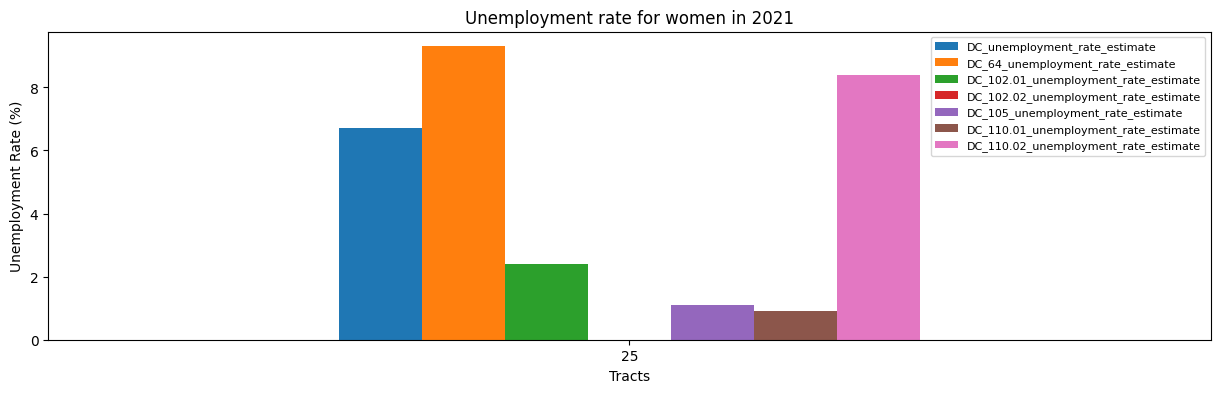

In [108]:
# ax = df_u_female.plot.bar(rot=0)
# ax.set_title('Unemployment rate for women in 2021') # convert the float to a string before concatenating
# ax.set_xlabel('Tracts')
# ax.set_ylabel('Unemployment Rate (%)')
# ax.legend(fontsize=4) # set the font size of the legend to 8
# plt.show()



ax = df_u_female.plot.bar(rot=0, figsize=(15, 4))
ax.set_title('Unemployment rate for women in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=8)
plt.show()

#### Race 

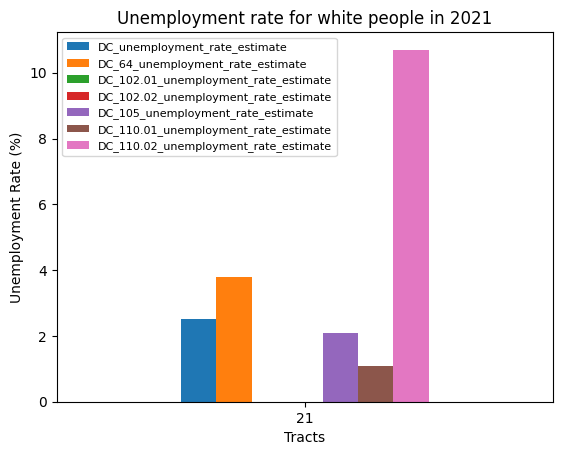

In [72]:
#White 

df_u_white = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u_white = df_u_white[df_u_white["Labels"] == 'White alone not hispanic or latino']

# Convert the percentage strings to floats
df_u_white = df_u_white.apply(lambda x: x.str.rstrip('%'))

# convert percentage values to floats
df_u_white.iloc[:, 1:] = df_u_white.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))


#exclude the first column
df_u_white = df_u_white.iloc[:, 1:]


ax = df_u_white.plot.bar(rot=0)
ax.set_title('Unemployment rate for white people in 2021') # convert the float to a string before concatenating
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=8) # set the font size of the legend to 8
plt.show()


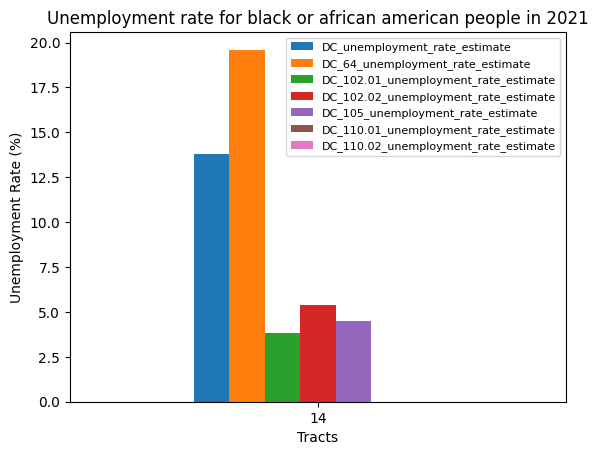

In [73]:
#black or african american alone

df_u_black = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u_black = df_u_black[df_u_black["Labels"] == 'Black or african american alone']

# Convert the percentage strings to floats
df_u_black = df_u_black.apply(lambda x: x.str.rstrip('%'))

# convert percentage values to floats
df_u_black.iloc[:, 1:] = df_u_black.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))


#exclude the first column
df_u_black = df_u_black.iloc[:, 1:]


ax = df_u_black.plot.bar(rot=0)
ax.set_title('Unemployment rate for black or african american people in 2021') # convert the float to a string before concatenating
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=8) # set the font size of the legend to 8
plt.show()

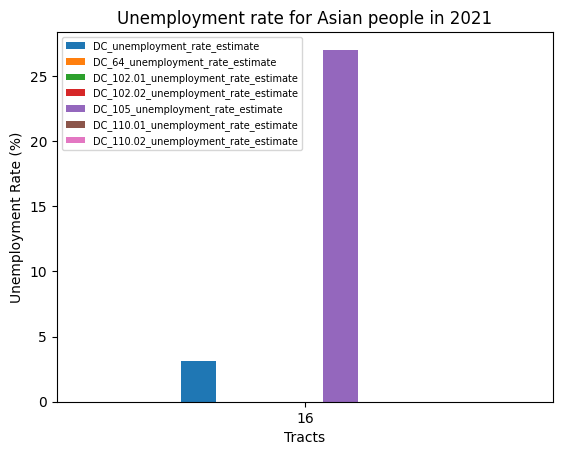

In [92]:
#Asian

df_u_asian = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u_asian = df_u_asian[df_u_asian["Labels"] == 'Asian alone']

# Convert the percentage strings to floats
df_u_asian = df_u_asian.apply(lambda x: x.str.rstrip('%'))

# convert percentage values to floats
df_u_asian.iloc[:, 1:] = df_u_asian.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))


#exclude the first column
df_u_asian = df_u_asian.iloc[:, 1:]



ax = df_u_asian.plot.bar(rot=0)
ax.set_title('Unemployment rate for Asian people in 2021') # convert the float to a string before concatenating
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=7) # set the font size of the legend to 8
plt.show()

# ax = df_u_asian.plot.bar(rot=0, figsize=(10,6))
# ax.set_title('Unemployment rate for Asian people in 2021')
# ax.set_xlabel('Tracts')
# ax.set_ylabel('Unemployment Rate (%)')
# ax.legend(fontsize=8)
# plt.show()

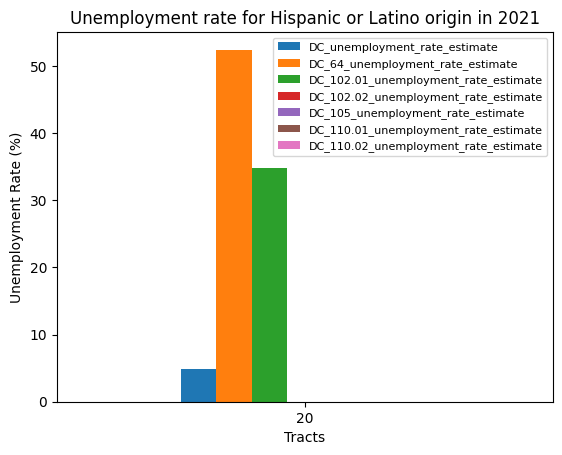

In [75]:
#Hispanic or latino origin (of any race)

df_u_hisp_lat = df_2021[['Labels','DC_unemployment_rate_estimate', 
       'DC_64_unemployment_rate_estimate',
       'DC_102.01_unemployment_rate_estimate', 
       'DC_102.02_unemployment_rate_estimate', 
       'DC_105_unemployment_rate_estimate', 
       'DC_110.01_unemployment_rate_estimate', 
       'DC_110.02_unemployment_rate_estimate']]

df_u_hisp_lat = df_u_hisp_lat[df_u_hisp_lat["Labels"] == 'Hispanic or latino origin (of any race)']

# Convert the percentage strings to floats
df_u_hisp_lat = df_u_hisp_lat.apply(lambda x: x.str.rstrip('%'))

# convert percentage values to floats
df_u_hisp_lat.iloc[:, 1:] = df_u_hisp_lat.iloc[:, 1:].apply(lambda x: x.str.rstrip('%').astype('float'))


#exclude the first column
df_u_hisp_lat = df_u_hisp_lat.iloc[:, 1:]


ax = df_u_hisp_lat.plot.bar(rot=0)
ax.set_title('Unemployment rate for Hispanic or Latino origin in 2021') # convert the float to a string before concatenating
ax.set_xlabel('Tracts')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(fontsize=8) # set the font size of the legend to 8
plt.show()

#### Employment population ratio

In [76]:
#Employment population ratio

df_epr = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr = df_epr[df_epr["Labels"] == 'Population 16 years and over']

df_epr

,Labels,DC_employment_population_ratio_estimate,DC_64_employment_population_ratio_estimate,DC_102.01_employment_population_ratio_estimate,DC_102.02_employment_population_ratio_estimate,DC_105_employment_population_ratio_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.02_employment_population_ratio_estimate
0,Population 16 years and over,65.8%,49.1%,81.5%,76.6%,78.7%,80.5%,67.0%


In [77]:
# Convert the percentage strings to floats
df_epr = df_epr.apply(lambda x: x.str.rstrip('%'))
df_epr

,Labels,DC_employment_population_ratio_estimate,DC_64_employment_population_ratio_estimate,DC_102.01_employment_population_ratio_estimate,DC_102.02_employment_population_ratio_estimate,DC_105_employment_population_ratio_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.02_employment_population_ratio_estimate
0,Population 16 years and over,65.8,49.1,81.5,76.6,78.7,80.5,67.0


In [78]:
# Exclude the first column
df_epr = df_epr.iloc[:, 1:]

In [79]:
#converting to float
df_epr = df_epr.astype(float)
df_epr

,DC_employment_population_ratio_estimate,DC_64_employment_population_ratio_estimate,DC_102.01_employment_population_ratio_estimate,DC_102.02_employment_population_ratio_estimate,DC_105_employment_population_ratio_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.02_employment_population_ratio_estimate
0,65.8,49.1,81.5,76.6,78.7,80.5,67.0


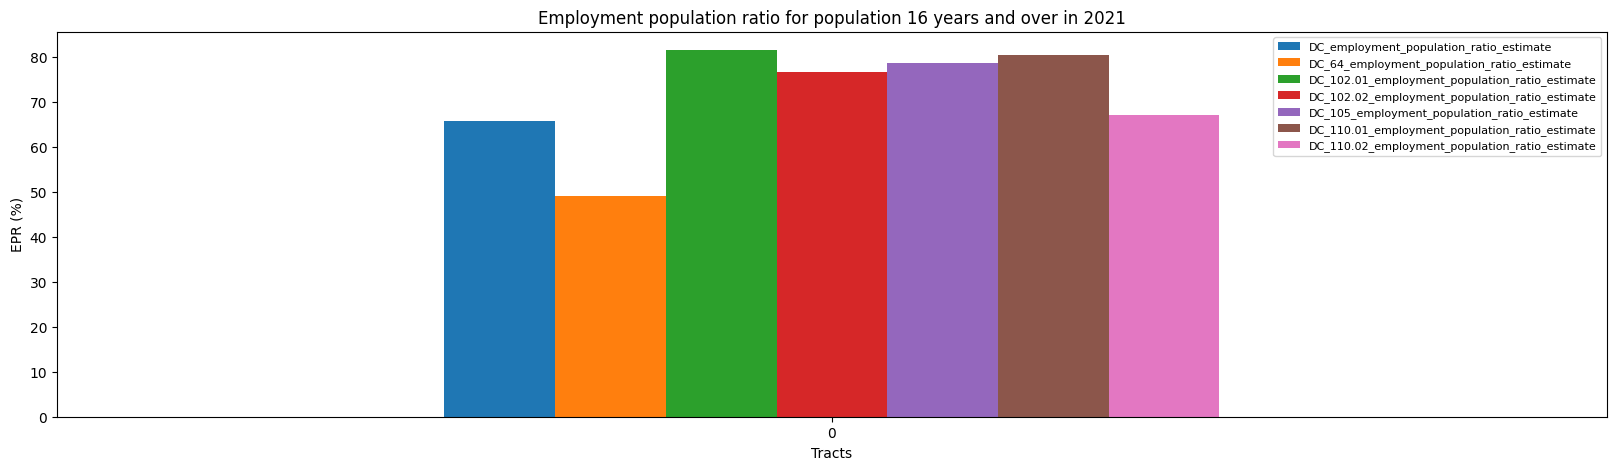

In [80]:
fig, ax = plt.subplots(figsize=(20, 5))
df_epr.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for population 16 years and over in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()

#### Breakdown by gender

In [81]:
#Employment population ratio for males

df_epr_male = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr_male = df_epr_male[df_epr_male["Labels"] == 'Male']

df_epr_male

,Labels,DC_employment_population_ratio_estimate,DC_64_employment_population_ratio_estimate,DC_102.01_employment_population_ratio_estimate,DC_102.02_employment_population_ratio_estimate,DC_105_employment_population_ratio_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.02_employment_population_ratio_estimate
24,Male,76.9%,67.9%,88.3%,83.3%,80.1%,90.8%,83.3%


In [82]:
# Convert the percentage strings to floats
df_epr_male = df_epr_male.apply(lambda x: x.str.rstrip('%'))

# Exclude the first column
df_epr_male = df_epr_male.iloc[:, 1:]

#converting to float
df_epr_male = df_epr_male.astype(float)

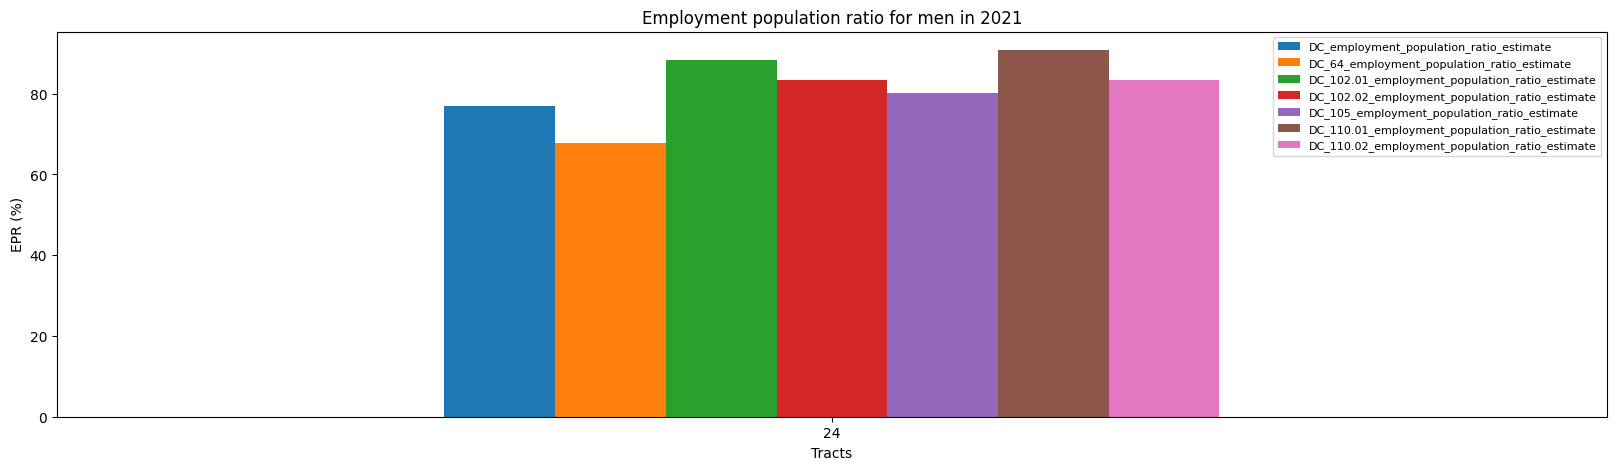

In [83]:
fig, ax = plt.subplots(figsize=(20, 5))
df_epr_male.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for men in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()

In [84]:
#Employment population ratio for females

df_epr_female = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr_female = df_epr_female[df_epr_female["Labels"] == 'Female']

df_epr_female

,Labels,DC_employment_population_ratio_estimate,DC_64_employment_population_ratio_estimate,DC_102.01_employment_population_ratio_estimate,DC_102.02_employment_population_ratio_estimate,DC_105_employment_population_ratio_estimate,DC_110.01_employment_population_ratio_estimate,DC_110.02_employment_population_ratio_estimate
25,Female,76.1%,56.0%,90.8%,94.2%,87.8%,87.1%,86.2%


In [85]:
# Convert the percentage strings to floats
df_epr_female = df_epr_female.apply(lambda x: x.str.rstrip('%'))

# Exclude the first column
df_epr_female = df_epr_female.iloc[:, 1:]

#converting to float
df_epr_female = df_epr_female.astype(float)

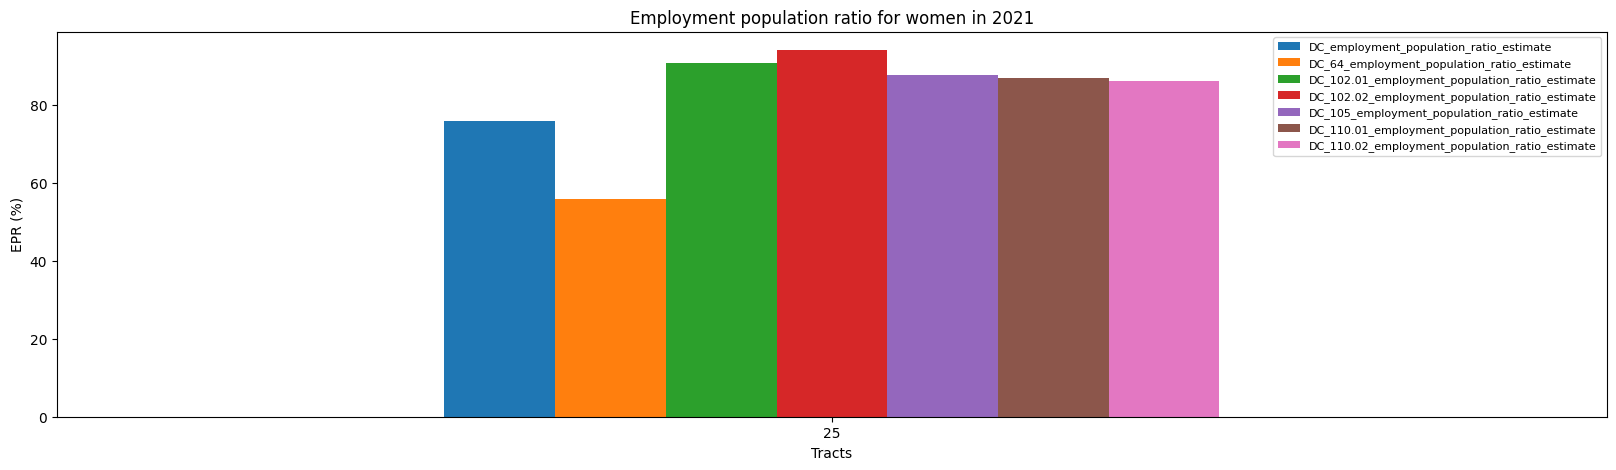

In [86]:
fig, ax = plt.subplots(figsize=(20, 5))
df_epr_female.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for women in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()

#### Breakdown by race

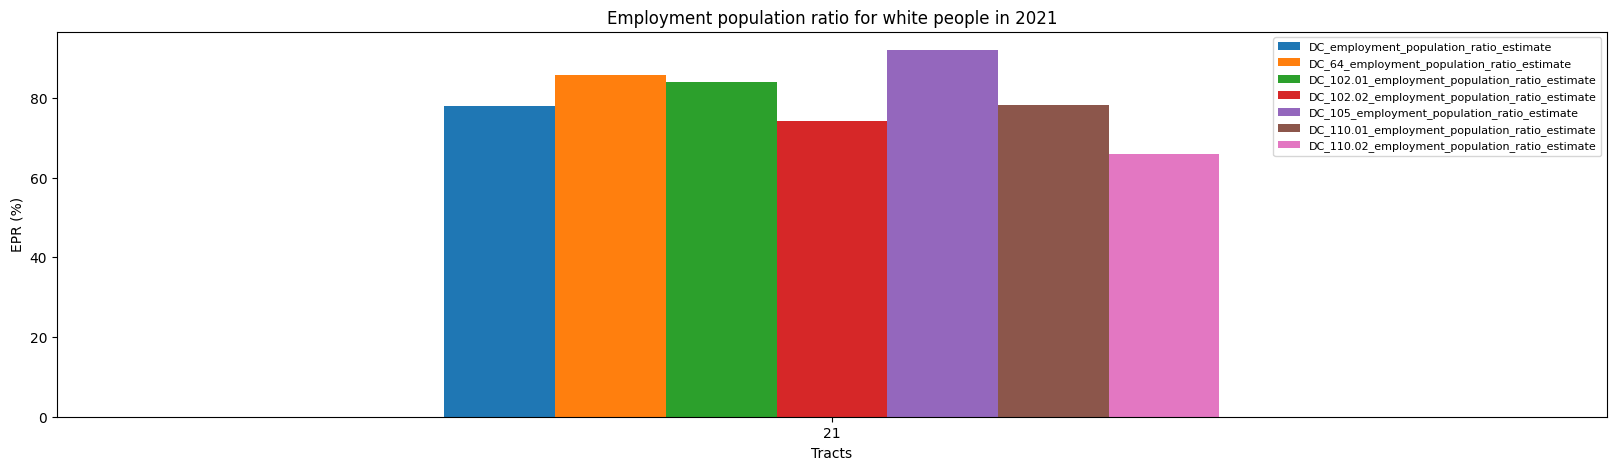

In [87]:
#White Employment population ratio

df_epr_white = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr_white = df_epr_white[df_epr_white["Labels"] == 'White alone not hispanic or latino']


# Convert the percentage strings to floats
df_epr_white = df_epr_white.apply(lambda x: x.str.rstrip('%'))

# Exclude the first column
df_epr_white = df_epr_white.iloc[:, 1:]

#converting to float
df_epr_white = df_epr_white.astype(float)

fig, ax = plt.subplots(figsize=(20, 5))
df_epr_white.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for white people in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()


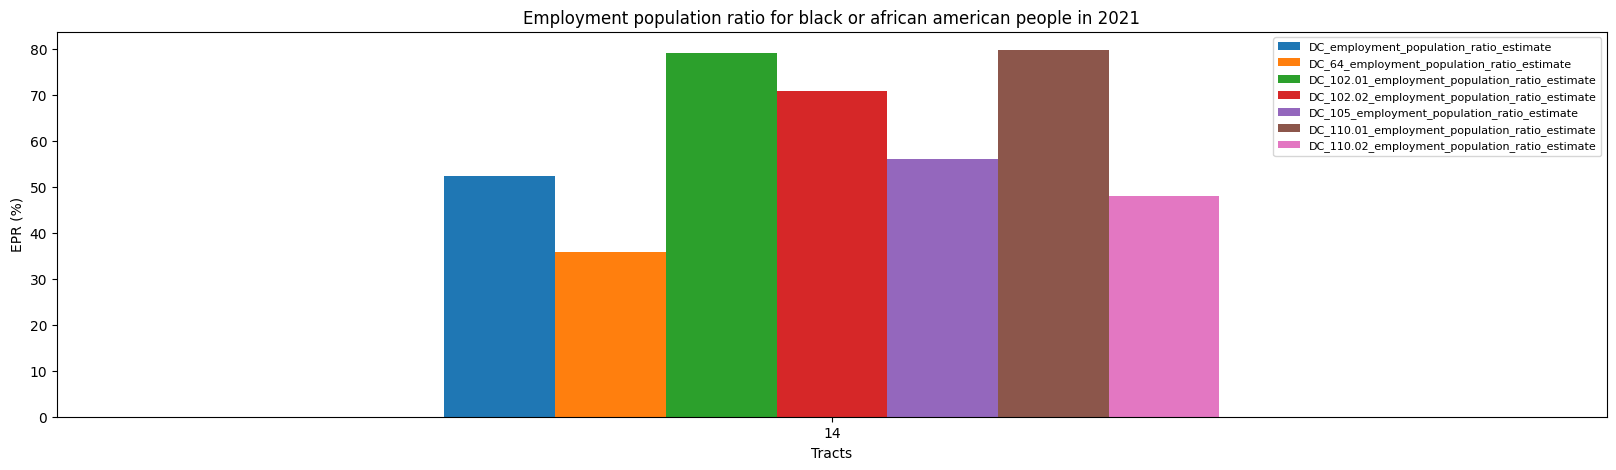

In [88]:
#black or african american alone

df_epr_black = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr_black = df_epr_black[df_epr_black["Labels"] == 'Black or african american alone']


# Convert the percentage strings to floats
df_epr_black = df_epr_black.apply(lambda x: x.str.rstrip('%'))

# Exclude the first column
df_epr_black = df_epr_black.iloc[:, 1:]

#converting to float
df_epr_black = df_epr_black.astype(float)

fig, ax = plt.subplots(figsize=(20, 5))
df_epr_black.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for black or african american people in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()




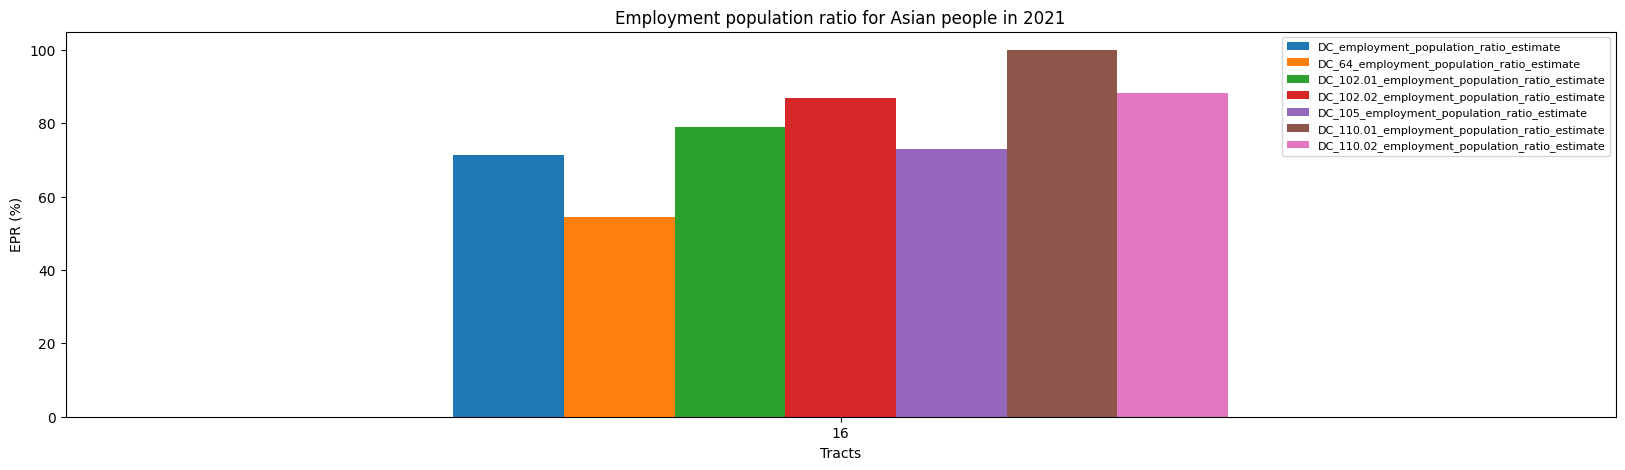

In [89]:
#Asian


df_epr_asian = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr_asian = df_epr_asian[df_epr_asian["Labels"] == 'Asian alone']


# Convert the percentage strings to floats
df_epr_asian = df_epr_asian.apply(lambda x: x.str.rstrip('%'))

# Exclude the first column
df_epr_asian = df_epr_asian.iloc[:, 1:]

#converting to float
df_epr_asian = df_epr_asian.astype(float)

fig, ax = plt.subplots(figsize=(20, 5))
df_epr_asian.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for Asian people in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()



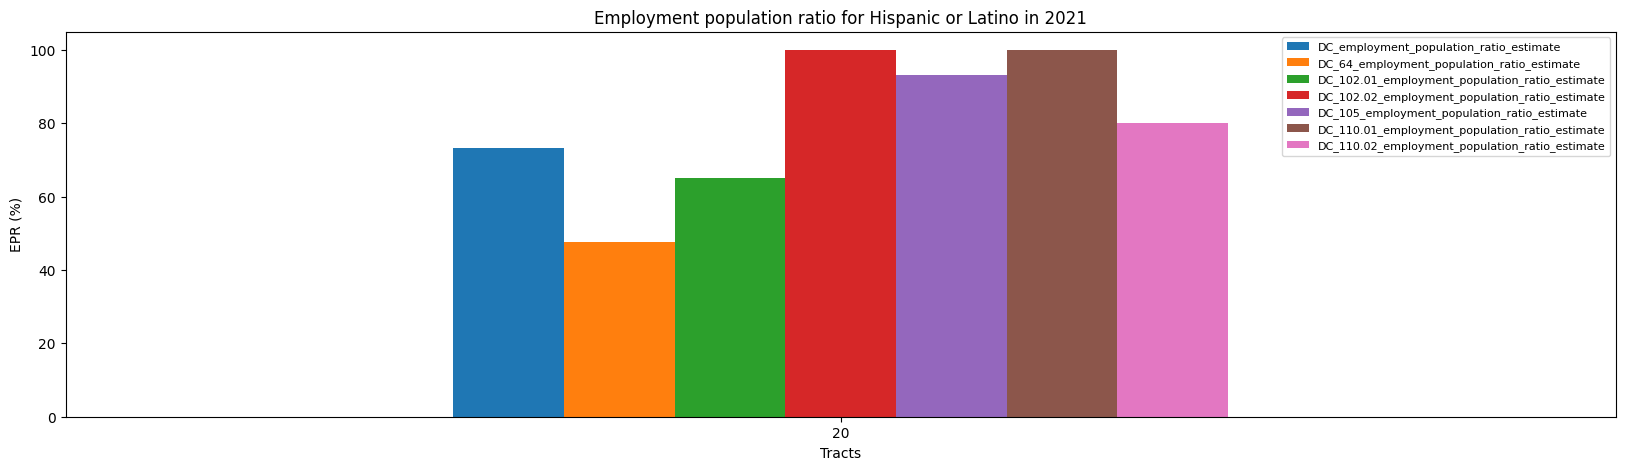

In [90]:
#Hispanic or latino origin (of any race)

df_epr_hisp_lat = df_2021[['Labels', 'DC_employment_population_ratio_estimate',
       'DC_64_employment_population_ratio_estimate',
       'DC_102.01_employment_population_ratio_estimate',
       'DC_102.02_employment_population_ratio_estimate',
       'DC_105_employment_population_ratio_estimate',
       'DC_110.01_employment_population_ratio_estimate',
       'DC_110.02_employment_population_ratio_estimate',]]

df_epr_hisp_lat = df_epr_hisp_lat[df_epr_hisp_lat["Labels"] == 'Hispanic or latino origin (of any race)']


# Convert the percentage strings to floats
df_epr_hisp_lat = df_epr_hisp_lat.apply(lambda x: x.str.rstrip('%'))

# Exclude the first column
df_epr_hisp_lat = df_epr_hisp_lat.iloc[:, 1:]

#converting to float
df_epr_hisp_lat = df_epr_hisp_lat.astype(float)

fig, ax = plt.subplots(figsize=(20, 5))
df_epr_hisp_lat.plot.bar(rot=0, ax=ax)
ax.set_title('Employment population ratio for Hispanic or Latino in 2021')
ax.set_xlabel('Tracts')
ax.set_ylabel('EPR (%)')
ax.legend(fontsize=8)
plt.show()

